In [35]:
# 1. Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
# 2. Loading the dataset

file_path = "../data/All Electronics.csv"
df = pd.read_csv(file_path)

In [37]:
# 3. Quick overview

print("Shape of dataset:", df.shape)
print("Data types:\n", df.dtypes)
display(df.head())

(9600, 9)
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"


In [38]:
# 4. Cleaning numerical columns

df['discount_price'] = df['discount_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].str.replace(',', ''), errors='coerce')
df['no_of_ratings'] = df['no_of_ratings'].fillna(0).astype(int)
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['ratings'] = df['ratings'].fillna(0).astype(float)

In [39]:
# 5. Calculate percentage discount between actual and discount price
df['discount_percent'] = round((1 - df['discount_price'] / df['actual_price']) * 100, 2)

In [40]:
# 6. Checking missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings               0
no_of_ratings         0
discount_price      484
actual_price         70
discount_percent    484
dtype: int64


In [41]:
# 7. Deleting lanes with missing values

df = df.dropna(subset=['discount_price', 'actual_price'])

In [42]:
# 8. Descriptive statistics for numerical columns

print(df[['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_percent']].describe())

           ratings  no_of_ratings  discount_price   actual_price  \
count  9116.000000    9116.000000     9116.000000    9116.000000   
mean      4.019713    8900.373080     2976.275592    5069.066845   
std       0.589667   28503.678557     8865.480379   12209.162421   
min       0.000000       0.000000       10.000000      30.000000   
25%       3.900000     211.000000      299.000000     899.000000   
50%       4.100000    1093.000000      580.500000    1499.000000   
75%       4.300000    4992.000000     1595.000000    3499.000000   
max       5.000000  437651.000000   134999.000000  161999.000000   

       discount_percent  
count       9116.000000  
mean          52.550171  
std           21.715125  
min            0.000000  
25%           36.860000  
50%           56.320000  
75%           70.070000  
max           97.890000  


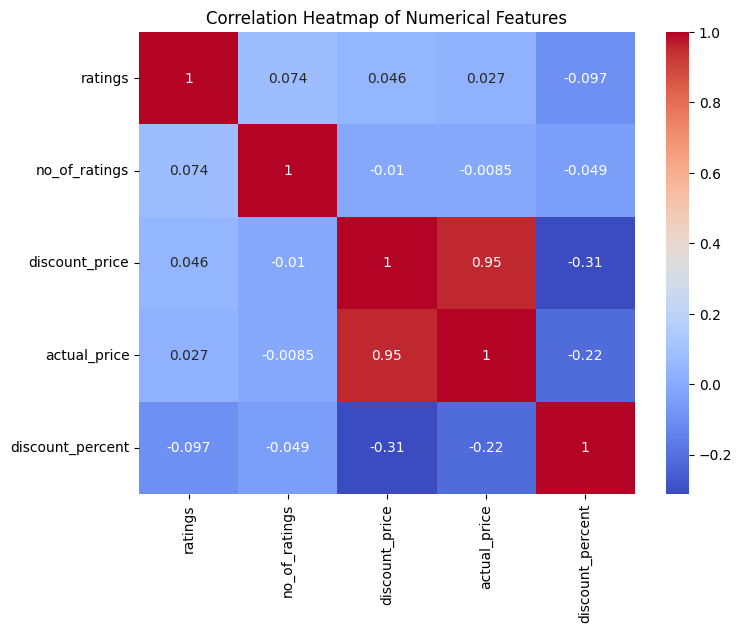

In [43]:
# 9. Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df[['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_percent']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [45]:
# 10. Top 10 products by number of ratings

top_10 = df.sort_values(by='no_of_ratings', ascending=False).head(10)
print(top_10[['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price']])

                                                   name  ratings  \
1217  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      4.4   
605   Amazon Basics Flexible Premium HDMI Cable (Bla...      4.4   
470   Amazon Basics High-Speed HDMI Cable - 10 Feet ...      4.4   
2542  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      4.4   
382   boAt BassHeads 100 in-Ear Wired Headphones wit...      4.1   
4365  boAt BassHeads 100 Delhi Capitals Edition Wire...      4.1   
170   boAt Bassheads 100 in Ear Wired Earphones with...      4.1   
848   boAt Bassheads 100 Wired in Ear Earphones with...      4.1   
280   boAt Bassheads 100 Wired in Ear Earphones with...      4.1   
15    boAt BassHeads 100 in-Ear Wired Headphones wit...      4.1   

      no_of_ratings  discount_price  actual_price  
1217         437651           269.0         475.0  
605          437651           269.0         700.0  
470          437651           379.0         995.0  
2542         437651           349.0        

In [46]:
# 11. Export cleaned data

df.to_csv('../data/cleaned_data_final.csv', index=False)